In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# set working directory

os.chdir('/content/drive/MyDrive/Colab Notebooks/데이콘_mnist')
!pwd  # 현재 디렉토리 확인

/content/drive/MyDrive/Colab Notebooks/데이콘_mnist


In [14]:
df = pd.read_csv('dacon_v2/dirty_mnist_2nd_answer.csv')

In [15]:
df['index'] = df['index'].apply(lambda x: str("{:0>5d}".format(x))+'.png')

In [7]:
df

,index,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,00000.png,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,1,0,0,1,1,1
1,00001.png,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1
2,00002.png,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0
3,00003.png,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0
4,00004.png,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995.png,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0
49996,49996.png,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,1
49997,49997.png,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0
49998,49998.png,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,0,0


In [ ]:
df.shape

(50000, 27)

In [ ]:
# from google.colab import output

In [ ]:
# # 현재 경로에 새로운 디렉토리 생성
# # 생성한 디렉토리에 zip파일 압축해제

# shutil.rmtree("hj/dirty_mnist", ignore_errors=True)  # 빈 폴더가 아니더라도 무시하고 삭제하는 코드
!mkdir "hj/dirty_mnist"
!unzip "dacon_v2/dirty_mnist_2nd.zip" -d "hj/dirty_mnist"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: hj/dirty_mnist/45000.png  
 extracting: hj/dirty_mnist/45001.png  
 extracting: hj/dirty_mnist/45002.png  
 extracting: hj/dirty_mnist/45003.png  
 extracting: hj/dirty_mnist/45004.png  
 extracting: hj/dirty_mnist/45005.png  
 extracting: hj/dirty_mnist/45006.png  
 extracting: hj/dirty_mnist/45007.png  
 extracting: hj/dirty_mnist/45008.png  
 extracting: hj/dirty_mnist/45009.png  
 extracting: hj/dirty_mnist/45010.png  
 extracting: hj/dirty_mnist/45011.png  
 extracting: hj/dirty_mnist/45012.png  
 extracting: hj/dirty_mnist/45013.png  
 extracting: hj/dirty_mnist/45014.png  
 extracting: hj/dirty_mnist/45015.png  
 extracting: hj/dirty_mnist/45016.png  
 extracting: hj/dirty_mnist/45017.png  
 extracting: hj/dirty_mnist/45018.png  
 extracting: hj/dirty_mnist/45019.png  
 extracting: hj/dirty_mnist/45020.png  
 extracting: hj/dirty_mnist/45021.png  
 extracting: hj/dirty_mnist/45022.png  
 extracting: hj/dirty_mnist/45023.png  
 ext

In [ ]:
# # 현재 경로에 새로운 디렉토리 생성
# # 생성한 디렉토리에 zip파일 압축해제

# shutil.rmtree("dacon_m12/dirty_mnist5", ignore_errors=True)  # 빈 폴더가 아니더라도 무시하고 삭제하는 코드
!mkdir "hj/test_route"
!mkdir "hj/test_route/test_dirty_mnist"
!unzip "dacon_v2/test_dirty_mnist_2nd.zip" -d "hj/test_route/test_dirty_mnist"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: hj/test_route/test_dirty_mnist/50000.png  
 extracting: hj/test_route/test_dirty_mnist/50001.png  
 extracting: hj/test_route/test_dirty_mnist/50002.png  
 extracting: hj/test_route/test_dirty_mnist/50003.png  
 extracting: hj/test_route/test_dirty_mnist/50004.png  
 extracting: hj/test_route/test_dirty_mnist/50005.png  
 extracting: hj/test_route/test_dirty_mnist/50006.png  
 extracting: hj/test_route/test_dirty_mnist/50007.png  
 extracting: hj/test_route/test_dirty_mnist/50008.png  
 extracting: hj/test_route/test_dirty_mnist/50009.png  
 extracting: hj/test_route/test_dirty_mnist/50010.png  
 extracting: hj/test_route/test_dirty_mnist/50011.png  
 extracting: hj/test_route/test_dirty_mnist/50012.png  
 extracting: hj/test_route/test_dirty_mnist/50013.png  
 extracting: hj/test_route/test_dirty_mnist/50014.png  
 extracting: hj/test_route/test_dirty_mnist/50015.png  
 extracting: hj/test_route/test_dirty_mnist/50016.png  
 extracting:

In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/데이콘_mnist


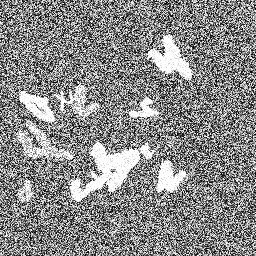

In [ ]:
from PIL import Image
 
image = Image.open("hj/dirty_mnist/00001.png")
image

In [ ]:
np.array(image).shape

(256, 256)

In [ ]:
from keras.applications.resnet50 import preprocess_input

In [9]:
train_data_dir = 'hj/dirty_mnist'
columns = list(map(chr, range(97, 123))) # 'abcde...xyz'를 만들어주는 코드

datagen=ImageDataGenerator(rescale=1./255., validation_split=0.1,
                           rotation_range=30,
                           horizontal_flip=True,
                           vertical_flip=True)

train_gen = datagen.flow_from_dataframe(dataframe=df,
                                        directory=train_data_dir,
                                        x_col='index',
                                        y_col=columns,
                                        batch_size=32,
                                        seed=1,
                                        color_mode='rgb',
                                        shuffle=True,
                                        class_mode='raw',
                                        target_size=(256, 256),
                                        subset='training')

val_gen = datagen.flow_from_dataframe(dataframe=df,
                                        directory=train_data_dir,
                                        x_col='index',
                                        y_col=columns,
                                        batch_size=32,
                                        seed=1,
                                        color_mode='rgb',
                                        shuffle=True,
                                        class_mode='raw',
                                        target_size=(256, 256),
                                        subset='validation')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 5 invalid image filename(s) in x_col="index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 44996 validated image filenames.
Found 5000 validated image filenames.


In [ ]:
test_dir = 'hj/test_route'
datagen_2 = ImageDataGenerator(rescale=1./255.)

test_gen = datagen_2.flow_from_directory(test_dir,                
                                        batch_size=32,               
                                        seed=42,
                                        shuffle=False,
                                        color_mode = "grayscale",    
                                        class_mode = None,  # label X     
                                        target_size=(256, 256))

KeyboardInterrupt: ignored

In [ ]:
val_gen = datagen.flow_from_dataframe(dataframe=df,
                                        directory=train_data_dir,
                                        x_col='index',
                                        batch_size=64,
                                        seed=1,
                                        color_mode='grayscale',
                                        shuffle=False,
                                        class_mode=None,
                                        target_size=(256, 256),
                                        subset='validation')

In [ ]:
test_df = pd.read_csv('dacon_m12/sample_submission.csv')
test_df['index'] = test_df['index'].apply(lambda x: str("{:0>5d}".format(x))+'.png')
test_df

NameError: ignored

In [ ]:
test_gen = datagen.flow_from_dataframe(dataframe=test_df,
                                        directory='hj/test_route/test_dirty_mnist',
                                        x_col='index',
                                        batch_size=32,
                                        seed=1,
                                        color_mode='grayscale',
                                        shuffle=False,
                                        class_mode=None,
                                        target_size=(256, 256))

Found 5000 validated image filenames.


In [ ]:
x_train, y_train = test_gen_again.next()
for idx in range(3):
    print(x_train[idx].shape)
    print(y_train[idx])

ValueError: ignored

In [ ]:
val_gen_test = datagen_2.flow_from_directory(test_dir,                
                                        batch_size=32,               
                                        seed=42,
                                        shuffle=False,
                                        color_mode = "grayscale",    
                                        class_mode = None,  # label X     
                                        target_size=(256, 256))

In [ ]:
train_data_dir = 'hj/dirty_mnist'
columns = list(map(chr, range(97, 123))) # 'abcde...xyz'를 만들어주는 코드

datagen_v2=ImageDataGenerator(rescale=1./255., validation_split=0.1, 
                           )
train_gen_v2 = datagen_v2.flow_from_dataframe(dataframe=df,
                                        directory=train_data_dir,
                                        x_col='index',
                                        y_col=columns,
                                        batch_size=16,
                                        seed=1,
                                        color_mode='grayscale',
                                        shuffle=True,
                                        class_mode='raw',
                                        target_size=(331, 331),
                                        subset='training')
val_gen_v2 = datagen_v2.flow_from_dataframe(dataframe=df,
                                        directory=train_data_dir,
                                        x_col='index',
                                        y_col=columns,
                                        batch_size=16,
                                        seed=1,
                                        color_mode='grayscale',
                                        shuffle=True,
                                        class_mode='raw',
                                        target_size=(331, 331),
                                        subset='validation')

Found 45000 validated image filenames.
Found 5000 validated image filenames.


In [ ]:
test_dir = 'dacon_m12/test_route'
datagen_2_v2 = ImageDataGenerator(rescale=1./255.)

test_gen_v2 = datagen_2_v2.flow_from_directory(test_dir,                
                                        batch_size=32,               
                                        seed=1,
                                        color_mode = "grayscale",  
                                        class_mode = None,  # label X         
                                        classes=None,
                                        shuffle=False,
                                        target_size=(331, 331))

FileNotFoundError: ignored

In [ ]:
x_train, y_train = train_gen.next()
for idx in range(3):  
    print(x_train[idx].shape)
    print(y_train[idx])

(256, 256, 1)
[1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0]
(256, 256, 1)
[1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0]
(256, 256, 1)
[1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1]


In [ ]:
from tqdm import tqdm

In [ ]:
x_train, y_train = train_gen.next()
y = []

for idx in tqdm(range(128)):
    y.append(y_train[idx])

100%|██████████| 128/128 [00:00<00:00, 380220.19it/s]


In [ ]:
np.mean(y, axis=0)

array([0.4375   , 0.5234375, 0.46875  , 0.4375   , 0.5078125, 0.4921875,
       0.484375 , 0.453125 , 0.5      , 0.3984375, 0.40625  , 0.4609375,
       0.5      , 0.5234375, 0.46875  , 0.4609375, 0.3984375, 0.4453125,
       0.4609375, 0.4609375, 0.4765625, 0.484375 , 0.3984375, 0.4375   ,
       0.453125 , 0.4453125])

In [ ]:
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# train_gen = datagen.flow_from_directory(directory=train_data_dir,
#                                         classes=None,
#                                         target_size=(256, 256), 
#                                         seed=42,
#                                         color_mode='grayscale',
#                                         class_mode=None,
#                                         subset='training')
# val_gen = datagen.flow_from_directory(directory=train_data_dir,
#                                       classes=None,
#                                       target_size=(256, 256),
#                                       seed=42,
#                                       color_mode='grayscale',
#                                       class_mode=None,
#                                       subset='validation')

### EMNIST 데이터 불러오기

In [ ]:
!pip install python-mnist

In [ ]:
import numpy as np
from mnist import MNIST

ModuleNotFoundError: ignored

In [ ]:
!wget http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
!unzip gzip.zip
!rm gzip.zip

--2021-02-23 03:08:19--  http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
Resolving www.itl.nist.gov (www.itl.nist.gov)... 132.163.4.36, 2610:20:6b01:4::36
Connecting to www.itl.nist.gov (www.itl.nist.gov)|132.163.4.36|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip [following]
--2021-02-23 03:08:19--  https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
Connecting to www.itl.nist.gov (www.itl.nist.gov)|132.163.4.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561753746 (536M) [application/zip]
Saving to: ‘gzip.zip’

gzip.zip            100%[===================>] 535.73M  86.3MB/s    in 6.3s    

2021-02-23 03:08:26 (84.6 MB/s) - ‘gzip.zip’ saved [561753746/561753746]

Archive:  gzip.zip
  inflating: gzip/emnist-balanced-mapping.txt  
  inflating: gzip/emnist-balanced-test-images-idx3-ubyte.gz  
 extracting: gzip/emnist-balanced-test-labels-id

In [ ]:
# load the entire EMNIST dataset as numpy arrays (this might take a while)
emnist_data = MNIST(path='gzip', return_type='numpy')
emnist_data.select_emnist('letters')
x_train, y_train = emnist_data.load_training()
x_test, y_test = emnist_data.load_testing()

NameError: ignored

In [ ]:
y_train[0]

23

In [ ]:
x_train.shape

(124800, 784)

In [ ]:
img_side = 28

# Reshape tensors to [n, y, x, 1] and normalize the pixel values between [0, 1]
x_train = x_train.reshape(-1, img_side, img_side).astype('float32') / 255.0
x_test = x_test.reshape(-1, img_side, img_side).astype('float32') / 255.0

NameError: ignored

In [ ]:
x_train.shape

(124800, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
im = Image.fromarray(x_train[0] * 255, mode='L')
im.save("hj/dirty_mnist/alphabet_00000.png")

In [9]:
### 다시

letters_train = pd.read_csv('hj/emnist-letters-train.csv')
letters_train

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88795,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88797,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
target = letters_train['23']
del letters_train['23']

In [11]:
target = tf.one_hot(target-1, depth=len(target.unique()))
target

<tf.Tensor: shape=(88799, 26), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
# 'alaphabet'으로 시작하는 파일 제거하기

# import os, glob
# for filename in glob.glob("hj/dirty_mnist/alphabet*"):
#     os.remove(filename) 

In [ ]:
# png 파일 만드는 코드

# for ind in tqdm(range(85445, letters_train.shape[0])):
#     first_image = letters_train.iloc[ind].to_numpy()
#     pixels = first_image.reshape((28, 28))
#     image = np.fliplr(pixels)
#     image = np.rot90(image)

#     plt.ioff()
#     fig = plt.figure(figsize=(28, 28), facecolor='black') 
#     plt.imshow(image, cmap='gray')
#     plt.savefig('hj/dirty_mnist/alphabet_' + "{:0>6d}".format(ind) + '.png',
#                 bbox_inces='tight',
#                 pad_inches=0, 
#                 transparent=True,
#                 facecolor=fig.get_facecolor())
#     plt.close(fig)

100%|██████████| 3354/3354 [40:59<00:00,  1.36it/s]


In [ ]:
# 클래스 분포

print(np.sum(target, axis=0)[:5])
print(np.sum(target, axis=0)[5:10])
print(np.sum(target, axis=0)[10:15])
print(np.sum(target, axis=0)[5:20])
print(np.sum(target, axis=0)[20:])

[3396. 3396. 3419. 3398. 3437.]
[3394. 3385. 3424. 3428. 3402.]
[3438. 3415. 3402. 3365. 3408.]
[3394. 3385. 3424. 3428. 3402. 3438. 3415. 3402. 3365. 3408. 3430. 3435.
 3419. 3392. 3436.]
[3419. 3422. 3422. 3437. 3453. 3427.]


In [12]:
from tqdm import tqdm

In [13]:
diction = {i:v for i, v in list(enumerate(list(np.array(target[0]))))}
diction['index'] = 'alphabet_000000.png'

In [14]:
alphabet_df = pd.DataFrame(data=diction, index=[0])
alphabet_df.columns = list(map(chr, range(97, 123))) + ['index']
alphabet_df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,index
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alphabet_000000.png


In [15]:
# alphabet_df 만들기

for i in tqdm(range(1, target.shape[0])):
    diction = {ind:val for ind, val in list(enumerate(list(np.array(target[i]))))}
    diction['index'] = 'alphabet_' + "{:0>6d}".format(i)  + '.png'
    sub_df = pd.DataFrame(data=diction, index=[i])
    sub_df.columns = list(map(chr, range(97, 123))) + ['index']
    alphabet_df = pd.concat([alphabet_df, sub_df])

alphabet_df

100%|██████████| 88798/88798 [05:49<00:00, 254.40it/s]


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,index
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alphabet_000000.png
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alphabet_000001.png
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alphabet_000002.png
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,alphabet_000003.png
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alphabet_000004.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alphabet_088794.png
88795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,alphabet_088795.png
88796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alphabet_088796.png
88797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,alphabet_088797.png


In [16]:
columns = list(map(chr, range(97, 123))) # 'abcde...xyz'를 만들어주는 코드
alphabet_df[columns] = alphabet_df[columns].astype(int)
alphabet_df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,index
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,alphabet_000000.png
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,alphabet_000001.png
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,alphabet_000002.png
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,alphabet_000003.png
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,alphabet_000004.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,alphabet_088794.png
88795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,alphabet_088795.png
88796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,alphabet_088796.png
88797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,alphabet_088797.png


In [37]:
alphabet_df[:8000]

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,index
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,alphabet_000000.png
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,alphabet_000001.png
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,alphabet_000002.png
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,alphabet_000003.png
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,alphabet_000004.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,alphabet_007995.png
7996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,alphabet_007996.png
7997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,alphabet_007997.png
7998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,alphabet_007998.png


In [39]:
print(np.sum(alphabet_df[:8000], axis=0)[:5])
print(np.sum(alphabet_df[:8000], axis=0)[5:10])
print(np.sum(alphabet_df[:8000], axis=0)[10:15])
print(np.sum(alphabet_df[:8000], axis=0)[15:20])
print(np.sum(alphabet_df[:8000], axis=0)[20:26])

a    308
b    283
c    329
d    308
e    306
dtype: object
f    287
g    296
h    324
i    318
j    332
dtype: object
k    307
l    315
m    322
n    288
o    300
dtype: object
p    326
q    287
r    281
s    326
t    307
dtype: object
u    327
v    325
w    319
x    291
y    301
z    287
dtype: object


In [17]:
import random

In [18]:
def add_noise(img):

    '''Add random noise to an image'''
    VARIABILITY = 75
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)

    return img

In [41]:
train_data_dir = 'hj/dirty_mnist'

datagen=ImageDataGenerator(rescale=1./255., validation_split=0.2,
                           zoom_range=[5, 10],
                           rotation_range=0.3,
                           #samplewise_std_normalization=True,
                           vertical_flip=True,
                           horizontal_flip=True,
                           width_shift_range=0.8,
                           height_shift_range=0.8,
                           preprocessing_function=add_noise
                           )

train_gen_alphabet = datagen.flow_from_dataframe(dataframe=alphabet_df[:8000],
                                        directory=train_data_dir,
                                        x_col='index',
                                        y_col=columns,
                                        batch_size=32,
                                        seed=1,
                                        color_mode='rgb',
                                        shuffle=True,
                                        class_mode='raw',
                                        target_size=(256, 256),
                                        subset='training')

val_gen_alphabet = datagen.flow_from_dataframe(dataframe=alphabet_df[:8000],
                                        directory=train_data_dir,
                                        x_col='index',
                                        y_col=columns,
                                        batch_size=32,
                                        seed=1,
                                        color_mode='rgb',
                                        shuffle=True,
                                        class_mode='raw',
                                        target_size=(256, 256),
                                        subset='validation')

Found 6400 validated image filenames.
Found 1600 validated image filenames.


In [ ]:
# train_gen_alphabet.reset()

In [ ]:
X_reshape = X.reshape(256, 256)
plt.imshow(X_reshape, cmap='gray')

In [ ]:
train_gen_alphabet.reset()

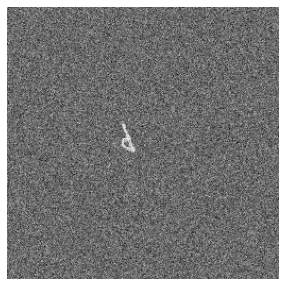

In [ ]:
X, y = train_gen_alphabet.next()
X_reshape = X.reshape(256, 256)

plt.figure(figsize=(5, 5)) 
plt.axis('off')
plt.imshow(X_reshape, cmap='gray')
plt.show()

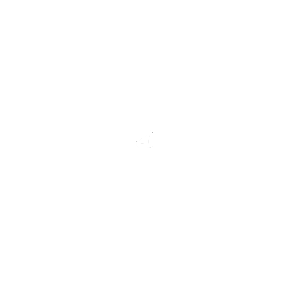

In [ ]:
x = cv2.bitwise_not(X_reshape) 

fig = plt.figure(figsize=(5, 5)) 
plt.axis('off')
plt.imshow(x, cmap='gray')
plt.show()

In [ ]:
import itertools 

In [ ]:
def combine_gen(*gens):
    while True:
        for g in gens:
            yield next(g)

In [ ]:
train_gen_final = combine_gen(train_gen_alphabet, train_gen)

In [ ]:
train_gen_final

<generator object combine_gen at 0x7fc4db7168e0>

In [ ]:
for i in range(3):
    cnt += 1

cnt

NameError: ignored

In [ ]:
a = list('v1_' + str(i) for i in range(13))
b = list('v2_' + str(i) for i in range(27))
tot = len(a)+len(b)
a_prop = len(a) / tot
a_prop

0.325

In [ ]:
len(a)

13

In [ ]:
a = list('v1_' + str(i) for i in range(13))
b = list('v2_' + str(i) for i in range(27))
a_prop = len(a) / (len(a)+len(b))

cnt_a = 0 
cnt_b = 0
for i in range(len(a)+len(b)):
    u = random.uniform(0, 1)
    if u < a_prop and cnt_a < len(a):
        print(i, a.pop(), cnt_a)
        cnt_a += 1 
    elif u >= a_prop or cnt_b < len(b):
        print(i, b.pop(), cnt_b)
        cnt_b += 1 
    else:
        print(i, a.pop(), cnt_a)
        cnt_a += 1 

0 v1_12 0
1 v2_26 0
2 v2_25 1
3 v2_24 2
4 v2_23 3
5 v1_11 1
6 v2_22 4
7 v2_21 5
8 v1_10 2
9 v2_20 6
10 v1_9 3
11 v2_19 7
12 v1_8 4
13 v2_18 8
14 v2_17 9
15 v1_7 5
16 v2_16 10
17 v2_15 11
18 v2_14 12
19 v2_13 13
20 v1_6 6
21 v2_12 14
22 v2_11 15
23 v2_10 16
24 v1_5 7
25 v2_9 17
26 v1_4 8
27 v2_8 18
28 v1_3 9
29 v2_7 19
30 v2_6 20
31 v1_2 10
32 v1_1 11
33 v2_5 21
34 v1_0 12
35 v2_4 22
36 v2_3 23
37 v2_2 24
38 v2_1 25
39 v2_0 26


In [ ]:
class CombinedGen():
    def __init__(self, *gens):
        self.gens = gens

    def generate(self):

        g1, g2 = self.gens

        g1_len = 45000
        g2_len = 88799
        tot = g1_len + g2_len
        g1_prop = g1_len / tot

        cnt_g1 = 0
        cnt_g2 = 0

        for i in range(tot):
            u = random.uniform(0, 1)
            if u < g1_prop and cnt_g1 < g1_len:
                yield next(g1)
                cnt_g1 += 1 
            elif u >= g1_prop or cnt_g2 < g2_len:
                yield next(g2)
                cnt_g2 += 1 
            else:
                yield next(g1)
                cnt_g1 += 1 


    def __len__(self):
        return sum([len(g) for g in self.gens])


In [ ]:
# usage:
train_gen_final = CombinedGen(train_gen_alphabet, train_gen)

In [ ]:
for item in train_gen_final

In [ ]:
def combine_generator(gen1, gen2):
    while True:
        yield(next(gen1), next(gen2))

In [ ]:
train_gen_final = combine_generator(train_gen_alphabet, train_gen)

In [ ]:
X, y = next(train_gen_final)
X_reshape = X.reshape(256, 256)
plt.imshow(X_reshape, cmap='gray')

TypeError: ignored

In [ ]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   4,   4,   2,   2,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,   4,   5,   9,  32,  32,  21,  21,  20,   9,   4,   2,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  21,  34,
         82, 125, 129, 140, 203, 203, 174, 172, 170, 140, 125,  63,  18,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,  20,  34,  84, 170, 204,
        233, 249, 250, 250, 254, 254, 252, 252, 252, 250, 237, 111,  32,
          0,   0],
       [  

In [ ]:
# im = Image.fromarray(image, mode='L')
# im
im.save("hj/dirty_mnist/alphabet_00000.jpeg")

In [ ]:
chr(96+7)

'g'

In [ ]:
x_train[0]

1.9006029e-08

In [ ]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pwd: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected


In [ ]:
np.save("hj/dirty_mnist/alphabet_00000.png", x_train[0])

### 모델링

In [48]:
tf.random.set_seed(1)
InceptionResNetV2_one_alpha = tf.keras.Sequential([tf.keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')
                              ])

In [49]:
InceptionResNetV2_one_alpha.compile(optimizer = tf.keras.optimizers.Nadam(), loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy()])

In [50]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'hj/InceptionResNetV2_one_alpha.h5', verbose=1, save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 3)

In [51]:
InceptionResNetV2_one_alpha.fit_generator(train_gen_alphabet, epochs=5, validation_data=val_gen_alphabet, callbacks=[checkpoint, early_stop_cb])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
200/200 [==============================] - 6155s 31s/step - loss: 0.2017 - binary_accuracy: 0.9253 - val_loss: 0.1381 - val_binary_accuracy: 0.9555

Epoch 00001: val_loss improved from inf to 0.13807, saving model to hj/InceptionResNetV2_one_alpha.h5
Epoch 2/5
200/200 [==============================] - 627s 3s/step - loss: 0.0791 - binary_accuracy: 0.9691 - val_loss: 0.0903 - val_binary_accuracy: 0.9699

Epoch 00002: val_loss improved from 0.13807 to 0.09031, saving model to hj/InceptionResNetV2_one_alpha.h5
Epoch 3/5
200/200 [==============================] - 631s 3s/step - loss: 0.0658 - binary_accuracy: 0.9745 - val_loss: 0.0825 - val_binary_accuracy: 0.9693

Epoch 00003: val_loss improved from 0.09031 to 0.08246, saving model to hj/InceptionResNetV2_one_alpha.h5
Epoch 4/5
200/200 [==============================] - 619s 3s/step - loss: 0.0583 - binary_accuracy: 0.9771 - val_loss: 0.0750 - val_binary_accuracy: 0.9732

Epoch 00004: val_loss improved from 0.08246 to 0.07498, 

In [18]:
from keras.models import load_model

In [19]:
pretrain = load_model('hj/InceptionResNetV2_one_alpha.h5')
pretrain.layers[0].trainable = False

transfer = tf.keras.Sequential([
                                pretrain.layers[0],

                                tf.keras.layers.GlobalAveragePooling2D(),
                                tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Activation('relu'),
                                tf.keras.layers.Dense(512, kernel_initializer='he_normal'),
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Activation('relu'),
                                tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Activation('relu'),
                                tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')
])

In [20]:
transfer.compile(optimizer = tf.keras.optimizers.Nadam(), loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy()])

In [21]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'hj/model/transfer.h5', verbose=1, save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
transfer.fit_generator(train_gen, epochs=30, validation_data=val_gen, callbacks=[checkpoint, early_stop_cb])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
 738/1407 [==============>...............] - ETA: 2:43:29 - loss: 0.7091 - binary_accuracy: 0.5226

In [ ]:
dtrain_list = list(train_gen())
train_list

In [ ]:
val_list = list(val_gen)
val_list

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, GlobalMaxPooling2D, Input, UpSampling2D

In [ ]:
def get_model():
    # The encoding process
    input_img = Input(shape=(256, 256, 1))  

    #### Encoding #

    # Conv1 #
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Conv2 #
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x) 

    # Conv 3 #
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    #### Decoding #

    # DeConv1
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)

    # DeConv2
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)

    # Deconv3
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(inputs=[input_img], outputs=[decoded])
    return model

In [ ]:
model = get_model()

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Nadam(), loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'hj/model/convolutional_ae.h5', verbose=1, save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
model.fit(train_list, train_list, epochs=30, validation_data=(val_list, val_list), callbacks=[checkpoint, early_stop_cb])

ValueError: ignored

In [ ]:
decoded_imgs = autoencoder.predict(train_list)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(train_list[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
(ResNeXt101 = tf.keras.Sequential([tf.keras.layers.Conv2D(3, (3, 3), padding='same', input_shape=[256, 256, 1]),
                              tf.keras.applications.resnext.ResNeXt101(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(512, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')
                              ])

AttributeError: ignored

In [ ]:
ResNeXt101.compile(optimizer = tf.keras.optimizers.Nadam(), loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy()])

NameError: ignored

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'hj/model/ResNeXt101.h5', verbose=1, save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
ResNeXt101.fit(train_gen, epochs=30, validation_data=val_gen, callbacks=[checkpoint, early_stop_cb])

Epoch 1/30
 868/1407 [=================>............] - ETA: 1:59:13 - loss: 0.7022 - binary_accuracy: 0.5321

In [ ]:
ResNet152 = tf.keras.Sequential([tf.keras.layers.Conv2D(3, (3, 3), padding='same', input_shape=[256, 256, 1]),
                              tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(512, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')
                              ])

234553344/234545216 [==============================] - 4s 0us/step


In [ ]:
ResNet152.compile(optimizer = tf.keras.optimizers.Nadam(), loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'hj/model/ResNet152.h5', verbose=1, save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
ResNet152.fit(train_gen, epochs=30, validation_data=val_gen, callbacks=[checkpoint, early_stop_cb])

Epoch 1/30
 868/1407 [=================>............] - ETA: 1:59:13 - loss: 0.7022 - binary_accuracy: 0.5321

In [ ]:
nasnet = tf.keras.Sequential([tf.keras.layers.Conv2D(3, (3, 3), padding='same', input_shape=[331, 331, 1]),
                              tf.keras.applications.nasnet.NASNetLarge(weights='imagenet', include_top=False, input_shape=(331, 331, 3)),
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')
                              ])

In [ ]:
nasnet.compile(optimizer = tf.keras.optimizers.Nadam(), loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'hj/NASNet.h5', verbose=1, save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
nasnet.fit(train_gen_v2, epochs=30, validation_data=val_gen_v2, callbacks=[checkpoint, early_stop_cb])

Epoch 1/30
2813/2813 [==============================] - 23931s 8s/step - loss: 0.6992 - binary_accuracy: 0.5308 - val_loss: 960533248.0000 - val_binary_accuracy: 0.4974

Epoch 00001: saving model to hj/NASNet.h5
Epoch 2/30
2813/2813 [==============================] - 4578s 2s/step - loss: 0.6936 - binary_accuracy: 0.5353 - val_loss: 21727465472.0000 - val_binary_accuracy: 0.4994

Epoch 00002: saving model to hj/NASNet.h5
Epoch 3/30
2813/2813 [==============================] - 4578s 2s/step - loss: 0.6930 - binary_accuracy: 0.5373 - val_loss: 23554861056.0000 - val_binary_accuracy: 0.5036

Epoch 00003: saving model to hj/NASNet.h5
Epoch 4/30
1083/2813 [==========>...................] - ETA: 46:01 - loss: 0.6927 - binary_accuracy: 0.5363

ResourceExhaustedError: ignored

In [ ]:
Xception = tf.keras.Sequential([tf.keras.layers.Conv2D(3, (3, 3), padding='same', input_shape=[256, 256, 1]),
                              tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(512, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')
                              ])

In [ ]:
Xception.compile(optimizer = tf.keras.optimizers.Nadam(), loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'hj/Xception_2nd.h5', verbose=1, save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
Xception.fit(train_gen, epochs=50, validation_data=val_gen, callbacks=[checkpoint, early_stop_cb])

Epoch 1/50
1407/1407 [==============================] - 750s 525ms/step - loss: 0.6983 - binary_accuracy: 0.5342 - val_loss: 0.7143 - val_binary_accuracy: 0.4963

Epoch 00001: val_loss improved from inf to 0.71427, saving model to hj/Xception_2nd.h5
Epoch 2/50
1407/1407 [==============================] - 738s 524ms/step - loss: 0.6768 - binary_accuracy: 0.5697 - val_loss: 3.3141 - val_binary_accuracy: 0.4981

Epoch 00002: val_loss did not improve from 0.71427
Epoch 3/50
1407/1407 [==============================] - 738s 524ms/step - loss: 0.6603 - binary_accuracy: 0.5916 - val_loss: 0.6774 - val_binary_accuracy: 0.5671

Epoch 00003: val_loss improved from 0.71427 to 0.67738, saving model to hj/Xception_2nd.h5
Epoch 4/50
1407/1407 [==============================] - 738s 524ms/step - loss: 0.6407 - binary_accuracy: 0.6154 - val_loss: 0.6291 - val_binary_accuracy: 0.6315

Epoch 00004: val_loss improved from 0.67738 to 0.62907, saving model to hj/Xception_2nd.h5
Epoch 5/50
1407/1407 [======

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'hj/Xception_2nd.h5', verbose=1)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
Xception.fit(train_gen, epochs=30, validation_data=val_gen, callbacks=[checkpoint, early_stop_cb])

Epoch 1/30
1407/1407 [==============================] - 737s 524ms/step - loss: 0.1570 - binary_accuracy: 0.9343 - val_loss: 0.7409 - val_binary_accuracy: 0.7699

Epoch 00001: saving model to hj/Xception_2nd.h5
Epoch 2/30
1407/1407 [==============================] - 737s 523ms/step - loss: 0.1506 - binary_accuracy: 0.9380 - val_loss: 0.6798 - val_binary_accuracy: 0.7838

Epoch 00002: saving model to hj/Xception_2nd.h5
Epoch 3/30
1407/1407 [==============================] - 737s 524ms/step - loss: 0.1312 - binary_accuracy: 0.9473 - val_loss: 0.7694 - val_binary_accuracy: 0.7792

Epoch 00003: saving model to hj/Xception_2nd.h5
Epoch 4/30
1407/1407 [==============================] - 736s 523ms/step - loss: 0.1179 - binary_accuracy: 0.9537 - val_loss: 0.7374 - val_binary_accuracy: 0.7764

Epoch 00004: saving model to hj/Xception_2nd.h5
Epoch 5/30
1407/1407 [==============================] - 736s 523ms/step - loss: 0.1034 - binary_accuracy: 0.9599 - val_loss: 0.7147 - val_binary_accuracy: 0

In [ ]:
Inception = tf.keras.Sequential([tf.keras.layers.Conv2D(3, (3, 3), padding='same', input_shape=[256, 256, 1]),
                              tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(512, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')
                              ])

In [ ]:
Inception.compile(optimizer = tf.keras.optimizers.Nadam(), loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'hj/Inception.h5', verbose=1, save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
Inception.fit(train_gen, epochs=30, validation_data=val_gen, callbacks=[checkpoint, early_stop_cb])

Epoch 1/50
 673/1407 [=============>................] - ETA: 3:11:13 - loss: 0.7029 - binary_accuracy: 0.5307

In [ ]:
# model load].
Xception = keras.models.load_model("hj/Xception.h5"

KeyboardInterrupt: ignored

In [ ]:
# prediction
result = Xception.predict_generator(test_gen_again)
result2 = result.copy()

In [ ]:
# get class label
result2[result2 <= 0.5] = 0
result2[result2 > 0.5] = 1

In [ ]:
test_df = pd.read_csv('dacon_m12/sample_submission.csv')
test_df

,index,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,50002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,50004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,54995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,54996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4997,54997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4998,54998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# frame create
col = list(test_df.columns[1:])
res = pd.DataFrame(result2, columns = col)
int_rest = res.astype(int)
submit = pd.concat([test_df.iloc[:,0],int_rest], axis = 1)

In [ ]:
submit['index'] = pd.read_csv('dacon_m12/sample_submission.csv')['index']
submit

,index,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,50000,1,0,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,1,1,1,0,1,0,1,1
1,50001,0,0,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,1,1,0,0,1,0
2,50002,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1
3,50003,1,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,1
4,50004,0,0,0,1,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,54995,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,1,0
4996,54996,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,1
4997,54997,1,0,1,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4998,54998,1,0,0,1,0,1,0,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0


In [ ]:
!mkdir "hj/submit"

In [ ]:
submit.to_csv('hj/submit/Xception.csv', index = False)

In [ ]:
resnet_model = tf.keras.applications.resnet_v2.ResNet50V2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [ ]:
resnet =  tf.keras.Sequential([tf.keras.layers.Conv2D(3, (3, 3), padding='same', input_shape=[256, 256, 1]),
                              resnet_model,
                              tf.keras.layers.GlobalMaxPooling2D(),
                              tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(512, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(128, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')])

In [ ]:
resnet.compile(optimizer = tf.keras.optimizers.Nadam(), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'dacon_m12/model/reset50_v3.h5', monitor='val_accuracy', verbose=1)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
resnet.fit(train_gen, epochs=100, validation_data=val_gen, callbacks=[checkpoint, early_stop_cb])

Epoch 1/100
625/625 [==============================] - 182s 269ms/step - loss: 0.6006 - accuracy: 0.0431 - val_loss: 0.7694 - val_accuracy: 0.0805

Epoch 00001: saving model to dacon_m12/model/reset50_v3.h5
Epoch 2/100
625/625 [==============================] - 166s 266ms/step - loss: 0.4988 - accuracy: 0.0500 - val_loss: 0.5167 - val_accuracy: 0.0329

Epoch 00002: saving model to dacon_m12/model/reset50_v3.h5
Epoch 3/100
625/625 [==============================] - 166s 266ms/step - loss: 0.4251 - accuracy: 0.0511 - val_loss: 0.5763 - val_accuracy: 0.0418

Epoch 00003: saving model to dacon_m12/model/reset50_v3.h5
Epoch 4/100
625/625 [==============================] - 166s 266ms/step - loss: 0.3475 - accuracy: 0.0441 - val_loss: 0.3990 - val_accuracy: 0.0523

Epoch 00004: saving model to dacon_m12/model/reset50_v3.h5
Epoch 5/100
625/625 [==============================] - 167s 266ms/step - loss: 0.2741 - accuracy: 0.0450 - val_loss: 0.3536 - val_accuracy: 0.0343

Epoch 00005: saving mode

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

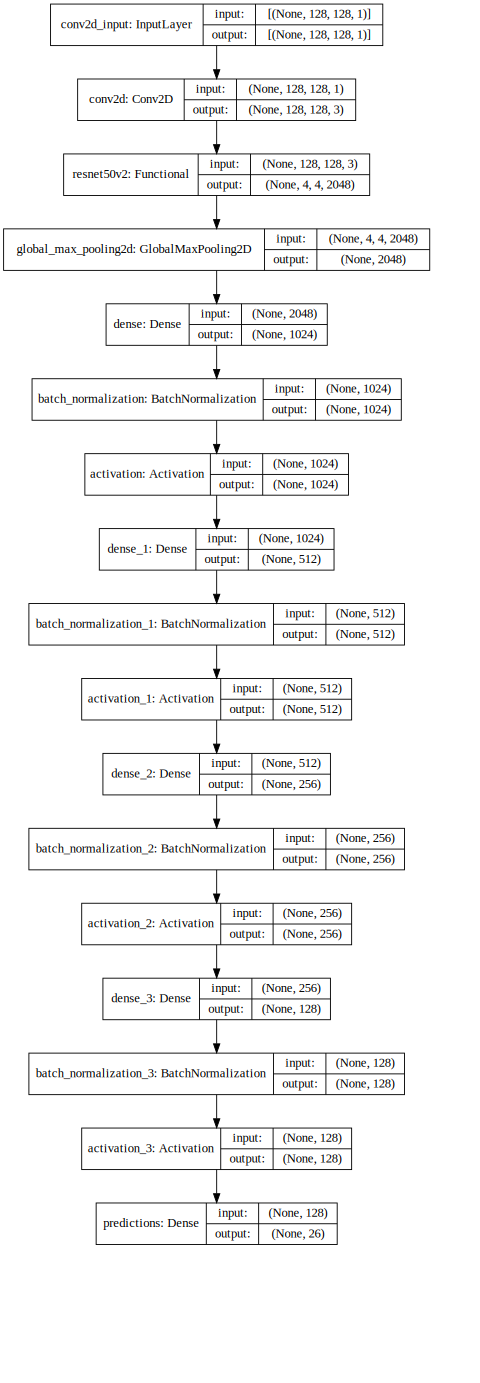

In [ ]:
SVG(model_to_dot(resnet, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

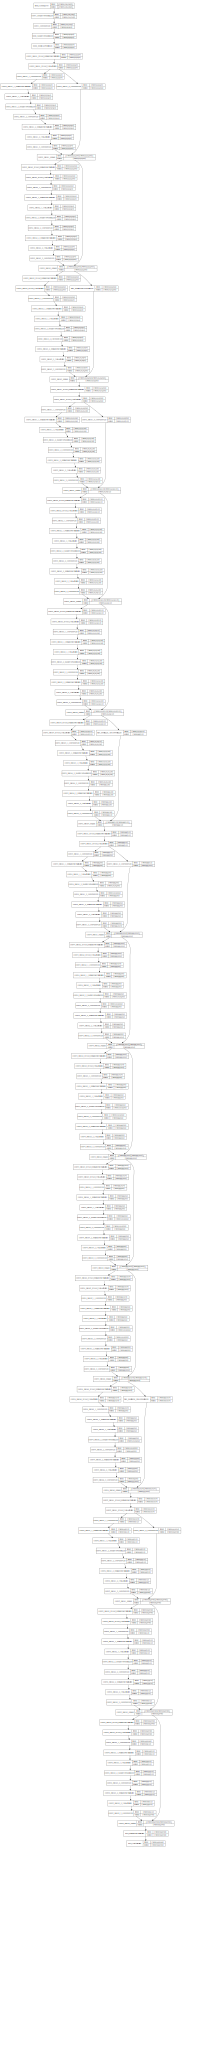

In [ ]:
SVG(model_to_dot(resnet_model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [ ]:
from keras.models import load_model
resnet = load_model('dacon_m12/model/reset50_v3.h5')

In [ ]:
resnet.predict()

In [ ]:
    aqresnet = tf.keras.Sequential([tf.keras.layers.Conv2D(3, (1, 1), padding='same', input_shape=[128, 128, 1]),
                              tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              
                              tf.keras.layers.Dense(512, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(128, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')
                              ])

In [ ]:
opt = keras.optimizers.Nadam(lr=0.0002, beta_1=0.5, beta_2=0.999, epsilon=None, schedule_decay=0.004)
resnet.compile(optimizer = opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'dacon_m12/model/resnet50.h5', monitor='val_accuracy', verbose=1)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
resnet.fit(train_gen, epochs=50, validation_data=val_gen, callbacks=[checkpoint, early_stop_cb])

IndexError: ignored

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
tf.keras.applications.resnet_v2.ResNet50V2

In [ ]:
resolution = 128
resnet_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

ipt = tf.keras.layers.Input(shape=(resolution, resolution, 1), name="input")
x = tf.keras.layers.Concatenate()([ipt, ipt, ipt])
x = tf.cast(x, tf.float32)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = resnet_model(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, kernel_initializer='he_normal')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dense(512, kernel_initializer='he_normal')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dense(256, kernel_initializer='he_normal')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dense(128, kernel_initializer='he_normal')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
out = tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')(x)

full_model = Model(inputs=ipt, outputs=out)

In [ ]:
opt = keras.optimizers.Nadam(lr=0.002, beta_1=0.5, beta_2=0.999, epsilon=None, schedule_decay=0.004)
full_model.compile(optimizer = opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'dacon_m12/model/reset50_v2.h5', monitor='val_accuracy', verbose=1)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
full_model.fit(train_gen, epochs=30, validation_data=val_gen, callbacks=[checkpoint, early_stop_cb])

Epoch 1/30
313/313 [==============================] - 25826s 83s/step - loss: 0.7061 - accuracy: 0.0424 - val_loss: 1.1161 - val_accuracy: 0.0000e+00

Epoch 00001: saving model to dacon_m12/model/reset50_v2.h5
Epoch 2/30
313/313 [==============================] - 108s 345ms/step - loss: 0.6893 - accuracy: 0.0254 - val_loss: 0.7086 - val_accuracy: 0.0048

Epoch 00002: saving model to dacon_m12/model/reset50_v2.h5
Epoch 3/30
313/313 [==============================] - 106s 338ms/step - loss: 0.6878 - accuracy: 0.0306 - val_loss: 0.7298 - val_accuracy: 0.0000e+00

Epoch 00003: saving model to dacon_m12/model/reset50_v2.h5
Epoch 4/30
313/313 [==============================] - 105s 334ms/step - loss: 0.6868 - accuracy: 0.0288 - val_loss: 1.7799 - val_accuracy: 0.1355

Epoch 00004: saving model to dacon_m12/model/reset50_v2.h5
Epoch 5/30
313/313 [==============================] - 108s 345ms/step - loss: 0.6865 - accuracy: 0.0281 - val_loss: 0.6897 - val_accuracy: 0.0010

Epoch 00005: saving m

In [ ]:
Xception = tf.keras.Sequential([tf.keras.layers.Conv2D(3, (1, 1), padding='same', input_shape=[128, 128, 1]),
                              tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(512, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')
                              ])

In [ ]:
Xception.compile(optimizer = opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'dacon_m12/model/resnet50.h5', monitor='val_accuracy', verbose=1)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
Xception.fit(train_gen, epochs=50, validation_data=val_gen, callbacks=[checkpoint, early_stop_cb])

Epoch 1/50
313/313 [==============================] - 122s 350ms/step - loss: 0.7138 - accuracy: 0.0064 - val_loss: 0.6885 - val_accuracy: 0.0272

Epoch 00001: saving model to dacon_m12/model/resnet50.h5
Epoch 2/50
313/313 [==============================] - 110s 352ms/step - loss: 0.6895 - accuracy: 0.0389 - val_loss: 0.7026 - val_accuracy: 2.0000e-04

Epoch 00002: saving model to dacon_m12/model/resnet50.h5
Epoch 3/50
313/313 [==============================] - 112s 357ms/step - loss: 0.6875 - accuracy: 0.0045 - val_loss: 0.6887 - val_accuracy: 0.3184

Epoch 00003: saving model to dacon_m12/model/resnet50.h5
Epoch 4/50
313/313 [==============================] - 112s 354ms/step - loss: 0.6868 - accuracy: 0.0316 - val_loss: 0.6909 - val_accuracy: 0.0034

Epoch 00004: saving model to dacon_m12/model/resnet50.h5
Epoch 5/50
313/313 [==============================] - 113s 360ms/step - loss: 0.6865 - accuracy: 0.0121 - val_loss: 0.8845 - val_accuracy: 0.0111

Epoch 00005: saving model to daco

KeyboardInterrupt: ignored

In [ ]:
chanDim = -1
model = Sequential()

# CONV => RELU => POOL
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(128, 128, 1)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FC => RELU
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(26, activation='sigmoid', name='predictions'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'dacon_m12/model/resnet50.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

In [ ]:
model.fit(train_gen, epochs=20, validation_data=val_gen, callbacks=[checkpoint], batch_size=32)

Epoch 1/20
1250/1250 [==============================] - 127s 101ms/step - loss: 0.7949 - accuracy: 0.0369 - val_loss: 67.9500 - val_accuracy: 0.2246

Epoch 00001: val_accuracy improved from -inf to 0.22460, saving model to model/simplevggnet.h5
Epoch 2/20
1250/1250 [==============================] - 114s 90ms/step - loss: 0.6999 - accuracy: 0.0351 - val_loss: 5.8210 - val_accuracy: 0.0377

Epoch 00002: val_accuracy did not improve from 0.22460
Epoch 3/20
1250/1250 [==============================] - 106s 85ms/step - loss: 0.6952 - accuracy: 0.0356 - val_loss: 1.0487 - val_accuracy: 0.0053

Epoch 00003: val_accuracy did not improve from 0.22460
Epoch 4/20
1250/1250 [==============================] - 106s 85ms/step - loss: 0.6915 - accuracy: 0.0372 - val_loss: 0.8536 - val_accuracy: 0.0430

Epoch 00004: val_accuracy did not improve from 0.22460
Epoch 5/20
1250/1250 [==============================] - 105s 84ms/step - loss: 0.6863 - accuracy: 0.0401 - val_loss: 0.6868 - val_accuracy: 0.0167

In [ ]:
## simple model

from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.layers import Activation, Convolution2D, BatchNormalization, Flatten, Dense, Dropout,MaxPool2D

model = Sequential()

# ( Conv => BN => LReLU ) * 2 => pool / 2 
model.add(Convolution2D(32, (7,7), padding='same', use_bias=False, input_shape=(128,128,1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

# ( Conv => BN => LReLU ) * 2 => pool / 2 
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

# ( Conv => BN => LReLU ) * 2 => pool / 2 
model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

# FC output flow 
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation = "sigmoid"))

In [ ]:
# complie 
# ---- opt     : Nesterov ADAM 디폴트세팅.
# ---- loss    : Binary Cross-Entropy (레이블별 BCE 오차의 총합으로 계산됨)
# ---- metrics : accuracy
opt = keras.optimizers.Nadam(lr=0.002, beta_1=0.5, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(optimizer = opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# callbacks
checkpoint = keras.callbacks.ModelCheckpoint(f'dacon_m12/model/m1_simple_v2.h5', monitor='val_accuracy', verbose=1)
early_stop_cb = keras.callbacks.EarlyStopping(patience = 10)

In [ ]:
# fit
model.fit(train_gen, epochs = 30, validation_data = val_gen, callbacks = [checkpoint, early_stop_cb])

Epoch 1/30
313/313 [==============================] - 94s 293ms/step - loss: 1.3058 - accuracy: 0.0100 - val_loss: 0.6902 - val_accuracy: 0.0000e+00

Epoch 00001: saving model to dacon_m12/model/m1_simple_v2.h5
Epoch 2/30
313/313 [==============================] - 89s 283ms/step - loss: 0.6903 - accuracy: 2.7026e-04 - val_loss: 0.6901 - val_accuracy: 0.0000e+00

Epoch 00002: saving model to dacon_m12/model/m1_simple_v2.h5
Epoch 3/30
313/313 [==============================] - 90s 287ms/step - loss: 0.6902 - accuracy: 0.0014 - val_loss: 0.6901 - val_accuracy: 0.0000e+00

Epoch 00003: saving model to dacon_m12/model/m1_simple_v2.h5
Epoch 4/30
313/313 [==============================] - 90s 287ms/step - loss: 0.6903 - accuracy: 3.5187e-04 - val_loss: 0.6901 - val_accuracy: 0.0000e+00

Epoch 00004: saving model to dacon_m12/model/m1_simple_v2.h5
Epoch 5/30
313/313 [==============================] - 91s 292ms/step - loss: 0.6902 - accuracy: 0.0023 - val_loss: 0.6901 - val_accuracy: 7.0000e-04

KeyboardInterrupt: ignored

In [ ]:
model_1 = tf.keras.Sequential([
                               tf.keras.applications.InceptionResNetV2(weights=None, include_top=False, input_shape=(256, 256, 1)),
                               tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')
])

In [ ]:
model_2 = tf.keras.Sequential([
                               tf.keras.applications.InceptionV3(weights=None, include_top=False, input_shape=(256, 256, 1)),
                               tf.keras.layers.GlobalAveragePooling2D(),
                               tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(512, kernel_initializer='he_normal'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(26, kernel_initializer='he_normal', activation='sigmoid', name='predictions')
                               ])

In [ ]:
model_3 = tf.keras.Sequential([
                               tf.keras.applications.Xception(weights=None, include_top=False, input_shape=(256, 256, 1)),
                               tf.keras.layers.GlobalAveragePooling2D(),
                               tf.keras.layers.Dense(1024, kernel_initializer='he_normal'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(512, kernel_initializer='he_normal'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(256, kernel_initializer='he_normal'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(10, kernel_initializer='he_normal', activation='softmax', name='predictions')
                               ])

In [ ]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint_2 = tf.keras.callbacks.ModelCheckpoint(f'model/model_2.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [ ]:
model_2.fit(train_gen, epochs=20, validation_data=val_gen, callbacks=[checkpoint_2])

Epoch 1/20
1250/1250 [==============================] - 989s 784ms/step - loss: 0.6909 - accuracy: 0.0418 - val_loss: 0.9925 - val_accuracy: 0.0045

Epoch 00001: val_accuracy improved from -inf to 0.00450, saving model to model/model_2.h5
Epoch 2/20
1250/1250 [==============================] - 978s 782ms/step - loss: 0.6855 - accuracy: 0.0383 - val_loss: 3.2473 - val_accuracy: 0.0253

Epoch 00002: val_accuracy improved from 0.00450 to 0.02530, saving model to model/model_2.h5
Epoch 3/20
1250/1250 [==============================] - 973s 778ms/step - loss: 0.6789 - accuracy: 0.0300 - val_loss: 0.9967 - val_accuracy: 0.0021

Epoch 00003: val_accuracy did not improve from 0.02530
Epoch 4/20
1250/1250 [==============================] - 976s 781ms/step - loss: 0.6714 - accuracy: 0.0103 - val_loss: 0.7737 - val_accuracy: 0.0011

Epoch 00004: val_accuracy did not improve from 0.02530
Epoch 5/20
1250/1250 [==============================] - 974s 779ms/step - loss: 0.6629 - accuracy: 0.0079 - val

In [ ]:
# keras_callbacks   = [
#       EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
#       ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
# ]

In [ ]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint_2 = tf.keras.callbacks.ModelCheckpoint(f'model/model_2.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
checkpoint_3 = tf.keras.callbacks.ModelCheckpoint(f'model/model_3.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [ ]:
model_2.fit_generator(train_gen, epochs=20, validation_data=val_gen, callbacks=[checkpoint_2])
model_3.fit_generator(train_gen, epochs=20, validation_data=val_gen, callbacks=[checkpoint_3])

NameError: ignored